In [83]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# initialize max pandas display size
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 20)

In [84]:
# read in the popular steam games data
df_steam = pd.read_csv('./steam_games_reqs/steam_games_req_data_cleaned.csv')
df_steam

,rank,name,min_req_dirX,min_req_graph_amd,min_req_graph_nvidia,min_req_mem,min_req_os,min_req_proc_amd,min_req_proc_intel,min_req_stor,rec_req_dirX,rec_req_graph_amd,rec_req_graph_nvidia,rec_req_mem,rec_req_os,rec_req_proc_amd,rec_req_proc_intel,rec_req_stor
0,1,Counter-Strike 2,version 11,NaN,NaN,8 GB,windows 10 32,NaN,intel core i5 750,85 GB,NaN,NaN,NaN,NaN,windows 10 32,NaN,NaN,NaN
1,2,Dota 2,version 11,amd radeon hd 2600,nvidia geforce 8600 gt,4 GB,windows 10 32,NaN,NaN,60 GB,NaN,NaN,NaN,NaN,windows 10 32,NaN,NaN,NaN
2,3,PUBG: BATTLEGROUNDS,version 11,amd radeon r7 370,nvidia geforce gtx 960,8 GB,windows 10 64,amd fx 6300,intel core i5 4430,40 GB,version 11,amd radeon rx 580,nvidia geforce gtx 1060,16 GB,windows 10 64,amd ryzen 5 1600,intel core i5 6600 k,50 GB
3,4,Apex Legends,version 11,amd radeon hd 7730,nvidia geforce gt 640,6 GB,windows 10 64,amd fx 4350,intel core i3 6300,75 GB,version 11,amd radeon r9 290,nvidia geforce gtx 970,8 GB,windows 10 64,NaN,NaN,75 GB
4,5,HELLDIVERS 2,NaN,amd radeon rx 470,nvidia geforce gtx 1050 ti,8 GB,windows 10 32,NaN,NaN,100 GB,NaN,amd radeon rx 6600 xt,nvidia geforce rtx 2060,16 GB,windows 10 32,amd ryzen 7 3700 x,intel core i7 9700 k,100 GB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Factorio,version 10.1,amd radeon hd 4850,nvidia geforce gtx 260,4 GB,windows Vista 64,NaN,NaN,3 GB,version 11,amd radeon r7 360,nvidia geforce gtx 750 ti,8 GB,windows 7 64,NaN,NaN,3 GB
96,97,Russian Fishing 4,version 11,NaN,nvidia geforce gtx 760,8 GB,windows 7 64,NaN,NaN,40 GB,version 11,NaN,nvidia geforce gtx 1060,8 GB,windows 7 64,NaN,NaN,40 GB
97,98,Squad,version 11,amd radeon hd 7970,nvidia geforce gtx 960,8 GB,windows 10 64,NaN,NaN,80 GB,version 12,amd radeon 570,nvidia geforce gtx 1060,16 GB,windows 10 64,NaN,NaN,80 GB
98,99,It Takes Two,version 11,amd radeon r7 260 x,nvidia geforce gtx 660,8 GB,windows 8.1 64,amd fx 6100,intel core i3 2100 t,50 GB,version 11,amd radeon r9 290 x,nvidia geforce gtx 980,16 GB,windows 8.1 64,amd ryzen 3 1300 x,intel core i5 3570 k,50 GB


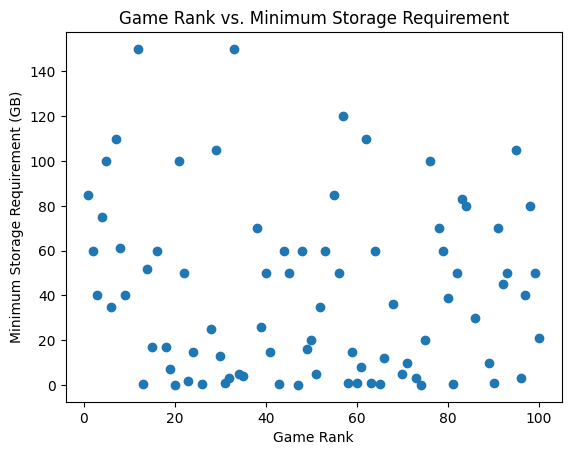

In [85]:
# Get the minimum storage requirement and store as a list (in GB)
min_stor = []
for game_stor in df_steam['min_req_stor']:
    if game_stor is not np.nan:
        data = re.search(r'^(?P<value>[0-9]+)? *(?P<units>[a-z]+)?', game_stor, re.IGNORECASE).groupdict()
        if data['units'] == 'MB': 
            data['value'] = int(data['value']) / 1000
            data['units'] = 'GB'
        else:
            data['value'] = int(data['value'])
        min_stor.append(data['value'])
    else:
        min_stor.append(np.nan)

# Plot the game rank vs. minimum storage requirement
plt.scatter(df_steam['rank'], min_stor)
plt.title('Game Rank vs. Minimum Storage Requirement')
plt.xlabel('Game Rank')
plt.ylabel('Minimum Storage Requirement (GB)')
plt.show()

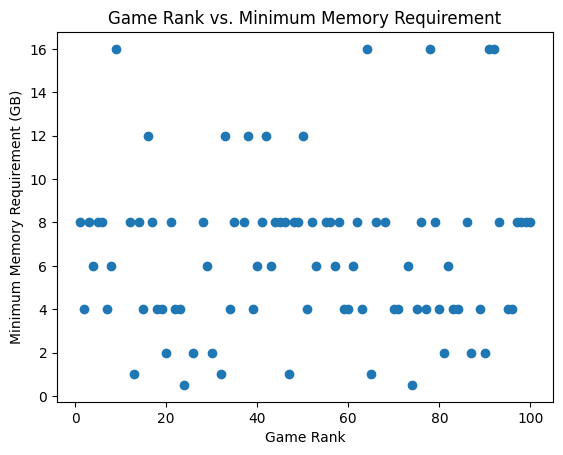

In [86]:
# get the minimum memory requirement and store as a list (in GB)
min_mem = []
for game_mem in df_steam['min_req_mem']:
    if game_mem is not np.nan:
        data = re.search(r'^(?P<value>[0-9]+)? *(?P<units>[a-z]+)?', game_mem, re.IGNORECASE).groupdict()
        if data['units'] == 'MB': 
            data['value'] = int(data['value']) / 1000
            data['units'] = 'GB'
        else:
            data['value'] = int(data['value'])
        min_mem.append(data['value'])
    else:
        min_mem.append(np.nan)

# Plot the game rank vs. minimum memory requirement
plt.scatter(df_steam['rank'], min_mem)
plt.title('Game Rank vs. Minimum Memory Requirement')
plt.xlabel('Game Rank')
plt.ylabel('Minimum Memory Requirement (GB)')
plt.show()

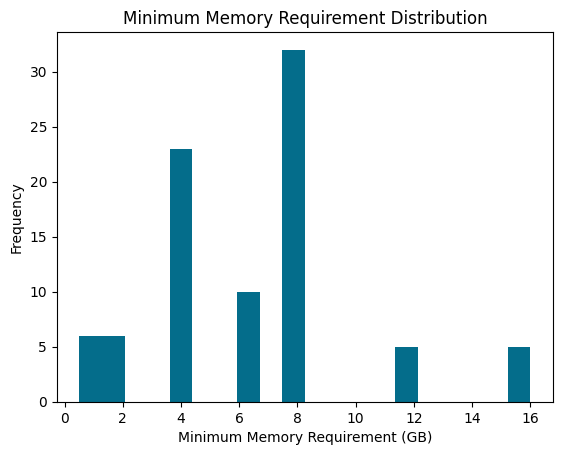

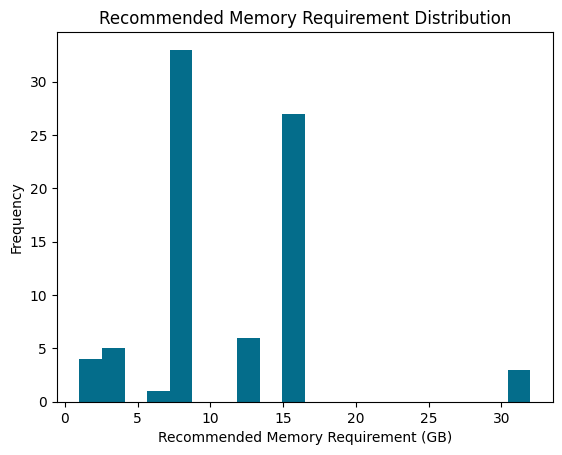

In [87]:
#create a histogram of the minimum memory requirement
plt.hist(min_mem, bins=20, color = '#046d8b')
plt.title('Minimum Memory Requirement Distribution')
plt.xlabel('Minimum Memory Requirement (GB)')
plt.ylabel('Frequency')
plt.show()

#create a histogram of the recommended memory requirement
rec_mem = []
for game_mem in df_steam['rec_req_mem']:
    if game_mem is not np.nan:
        data = re.search(r'^(?P<value>[0-9]+)? *(?P<units>[a-z]+)?', game_mem, re.IGNORECASE).groupdict()
        if data['units'] == 'MB': 
            data['value'] = int(data['value']) / 1000
            data['units'] = 'GB'
        else:
            data['value'] = int(data['value'])
        rec_mem.append(data['value'])
    else:
        rec_mem.append(np.nan)
plt.hist(rec_mem, bins=20, color = '#046d8b')
plt.title('Recommended Memory Requirement Distribution')
plt.xlabel('Recommended Memory Requirement (GB)')
plt.ylabel('Frequency')
plt.show()




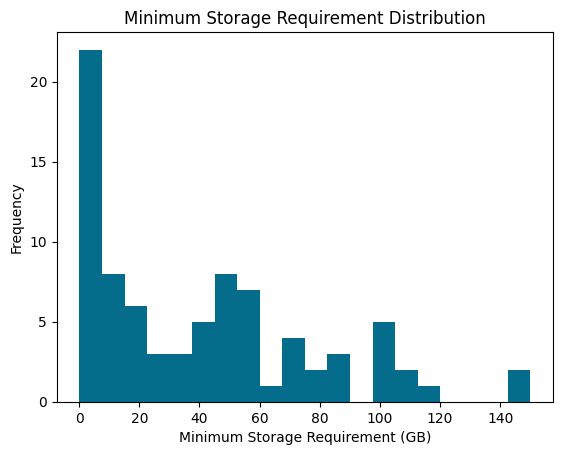

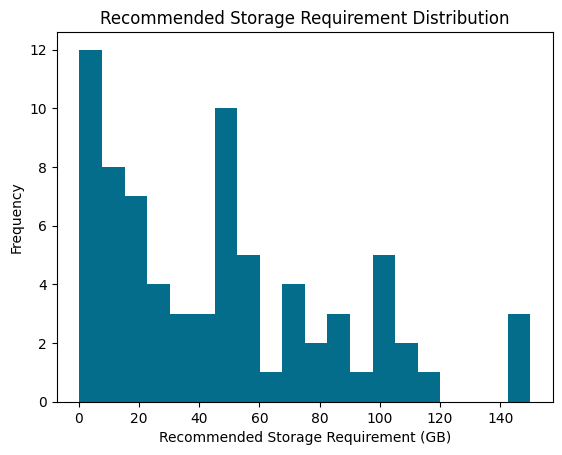

In [88]:
# create a histogram of the minimum storage requirement
plt.hist(min_stor, bins=20, color = '#046d8b')
plt.title('Minimum Storage Requirement Distribution')
plt.xlabel('Minimum Storage Requirement (GB)')
plt.ylabel('Frequency')
plt.show()

# create a histogram of the recommended storage requirement
rec_stor = []
for game_stor in df_steam['rec_req_stor']:
    if game_stor is not np.nan:
        data = re.search(r'^(?P<value>[0-9]+)? *(?P<units>[a-z]+)?', game_stor, re.IGNORECASE).groupdict()
        if data['units'] == 'MB': 
            data['value'] = int(data['value']) / 1000
            data['units'] = 'GB'
        else:
            data['value'] = int(data['value'])
        rec_stor.append(data['value'])
    else:
        rec_stor.append(np.nan)

plt.hist(rec_stor, bins=20, color = '#046d8b')
plt.title('Recommended Storage Requirement Distribution')
plt.xlabel('Recommended Storage Requirement (GB)')
plt.ylabel('Frequency')
plt.show()


In [89]:
# read in data from pc part picker for cpu
df_cpu = pd.read_csv('./PC_Part_Picker_Datasets/CPU_Data.csv')

# convert the price column to a float
df_cpu['Price'] = df_cpu['Price'].replace('[\$,]', '', regex=True).astype(float)
df_cpu

,Brand,Model,Core Count,Performance Core Clock,Boost Clock,TDP,Integrated Graphics,Sockets Supported,Rating,Rating Count,Price,Release Year,Socket Type
0,AMD,Ryzen 7 7800X3D,8,4.2 GHz,5 GHz,120 W,Radeon,Yes,5,208,369.00,2022.0,AM5
1,AMD,Ryzen 5 7600X,6,4.7 GHz,5.3 GHz,105 W,Radeon,Yes,5,113,218.46,2022.0,AM5
2,AMD,Ryzen 5 5600X,6,3.7 GHz,4.6 GHz,65 W,NaN,Yes,5,609,151.24,2021.0,AM4
3,Intel,Core i9-14900K,24,3.2 GHz,6 GHz,125 W,Intel UHD Graphics 770,Yes,5,13,544.99,2023.0,LGA 1700
4,AMD,Ryzen 5 7600,6,3.8 GHz,5.1 GHz,65 W,Radeon,Yes,5,65,260.73,2022.0,AM5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,Intel,Core i7-7820X,8,3.6 GHz,4.5 GHz,140 W,NaN,Yes,0,0,489.05,2016.0,LGA 1151
206,Intel,Core i7-7740X,4,4.3 GHz,4.5 GHz,112 W,NaN,Yes,0,0,504.57,2016.0,LGA 1151
207,Intel,Core i5-8600,6,3.1 GHz,4.3 GHz,65 W,Intel UHD Graphics 630,No,0,0,269.95,2017.0,LGA 1151
208,Intel,Core i5-7600T,4,2.8 GHz,3.7 GHz,35 W,Intel HD Graphics 630,No,0,0,229.95,2016.0,LGA 1151


In [90]:
# read in data from pc part picker for gpu
df_gpu = pd.read_csv('./PC_Part_Picker_Datasets/GPU_Data.csv')

# convert the price column to a float
df_gpu['Price'] = df_gpu['Price'].replace('[\$,]', '', regex=True).astype(float)
df_gpu

,Name,Chipset,Memory,Core Clock,Boost Clock,Length,Rating,Rating Count,Price
0,MSI GeForce RTX 3060 Ventus 2X 12G,GeForce RTX 3060 12GB,12.0,1320 MHz,1777 MHz,235 mm,5,26,309.99
1,Gigabyte WINDFORCE OC,GeForce RTX 4070,12.0,1920 MHz,2490 MHz,261 mm,5,18,549.99
2,Asus DUAL OC,GeForce RTX 4060,8.0,1830 MHz,2535 MHz,227 mm,5,4,304.99
3,Asus ROG STRIX GAMING OC,GeForce RTX 4090,24.0,2235 MHz,2640 MHz,358 mm,5,8,2423.90
4,PNY VCNRTX6000ADA-PB,RTX 6000 Ada Generation,48.0,915 MHz,2505 MHz,267 mm,0,0,9999.00
...,...,...,...,...,...,...,...,...,...
1056,ATI FirePro S7000,FirePro S7000,4.0,950 MHz,NaN,292 mm,0,0,299.99
1057,HP C2J94AT,Quadro K4000,3.0,810 MHz,NaN,241 mm,0,0,199.99
1058,ATI 100-505553,FirePro V5700,0.5,NaN,NaN,NaN,0,0,129.99
1059,ATI FirePro RG220A,FirePro RG220A,0.5,800 MHz,NaN,168 mm,0,0,120.00


In [91]:
# create a function to search the pc part picker gpu data by Chipset and return price
def get_gpu_price(req_chipset):

    # split the input string into it's pieces (space delimited, ignoring first 2 words as they are the same for every chipset in the steam data)
    words = req_chipset.lower().split(' ')
    brand = words[0]
    req_chipset_words = words[1:]
    
    # loop over all rows of the gpu dataframe
    matches = []
    for index, row in df_gpu.iterrows():

        # split the chipset_row into it's pieces (space delimited)
        chipset_row = row['Chipset'].lower().split(' ')

        # Loop over all words in the chipset_row
        for word in chipset_row:

            # if the word contains a dash, split it into two words
            if '-' in word:
                chipset_row.remove(word)
                chipset_row.extend(word.split('-'))

        # Loop over all words in the chipset_row
        for word in chipset_row:

            # if the word contains one or more numbers followed by one or more letters, split it into two words
            if re.search(r'([0-9]+)([a-z]+)', word):
                chipset_row.remove(word)
                chipset_row.extend(re.findall(r'[0-9]+|[a-z]+', word))

        # initialize the partial match counter
        partial_matches = 0

        # loop over all words in the chipset string
        for word in req_chipset_words:

            # check if the word appears in the chipset row
            if word in chipset_row:

                # increment the partial match counter
                partial_matches += 1
        
        # if all the words match
        if partial_matches == len(req_chipset_words):

            # if an nvidia card
            if brand == 'nvidia':

                # if there is no 'ti' in the chipset words, but there is in the chipset name
                if 'ti' not in req_chipset_words and 'ti' in chipset_row:

                    # skip this row
                    continue

                # if there is no 'super' in the chipset words, but there is in the chipset name
                elif 'super' not in req_chipset_words and 'super' in chipset_row:

                    # skip this row
                    continue
                
                else:

                    # add the price and product to the matches list
                    matches.append((f'{row["Name"]} | {row["Chipset"]}', row['Price']))

            else: # else is AMD

                # add the price and product to the matches list
                matches.append((f'{row["Name"]} | {row["Chipset"]}', row['Price']))

    return matches

In [92]:
# loop over all rows of the steam games dataframe
new_rows = {'min': [], 'rec': []}
for index, row in df_steam.iterrows():

    # initialize flag to check if we wrote a row this loop
    wrote_something = False

    # loop over min and rec gpu columns
    for req in ['min', 'rec']:

        # loop over gpu brands
        for gpu_brand in ['nvidia', 'amd']:

            # get the gpu requirement
            gpu = row[f'{req}_req_graph_{gpu_brand}']

            # if the gpu requirement is not nan
            if gpu is not np.nan:

                # gat all gpus that match the gpu requirement
                matches = get_gpu_price(gpu)
                
                # remove any matches where the price is nan
                matches = [(product, price) for product, price in matches if not np.isnan(price)]

                # if there are any remaining matches
                if len(matches) > 0:

                    # loop over all matches
                    for product, price in matches:

                        # initialize new row
                        new_row = {'rank'      : row['rank']                   ,
                                   'name'      : row['name']                   ,
                                   'req_nvidia': row[f'{req}_req_graph_nvidia'],
                                   'req_amd'   : row[f'{req}_req_graph_amd'   ],
                                   'brand'     : gpu_brand                     ,
                                   'name '     : np.nan                        ,
                                   'chip '     : np.nan                        ,
                                   'cost '     : np.nan                        ,}
                        
                        # split product into name and chipset with delimiter ' | '
                        name, chip = product.split(' | ')

                        # add columns for product and price of the gpu match
                        new_row[f'name'] = name
                        new_row[f'chip'] = chip
                        new_row[f'cost'] = price

                        # append new_row to new_rows
                        new_rows[req].append(new_row)
                        wrote_something = True
    
        if not wrote_something:

            # initialize new row
            new_row = {'rank'       : row['rank']                   ,
                        'name'      : row['name']                   ,
                        'req_nvidia': row[f'{req}_req_graph_nvidia'],
                        'req_amd'   : row[f'{req}_req_graph_amd'   ],
                        'brand'     : np.nan                        ,
                        'name '     : np.nan                        ,
                        'chip '     : np.nan                        ,
                        'cost '     : np.nan                        ,}
            new_rows[req].append(new_row)

<Figure size 640x480 with 0 Axes>

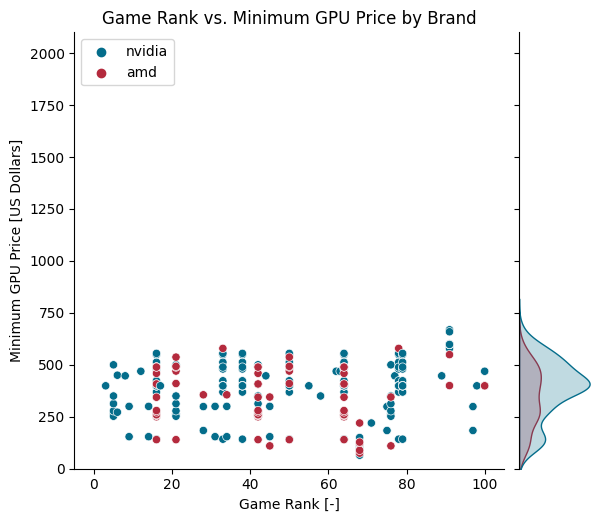

In [93]:
# # prevent datframe from being truncated
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

# create a dataframe from new_rows for minimum gpu requirements
df_steam_min_gpu = pd.DataFrame(new_rows['min'])
# df_steam_min_gpu

# plot the price of the minimum nvidia gpu as box plots grouped by game rank
plt.figure()
sns.jointplot(x='rank', y='cost', data=df_steam_min_gpu, hue='brand', palette={'nvidia': '#046d8b', 'amd': '#b42a3d'})
plt.title('Game Rank vs. Minimum GPU Price by Brand')
plt.xlabel('Game Rank [-]')
plt.ylabel('Minimum GPU Price [US Dollars]')
plt.legend(loc='upper left')
plt.xlim(-5, 105)
plt.ylim(0, 2100)
plt.gcf().get_children()[2].remove()
plt.show()

<Figure size 640x480 with 0 Axes>

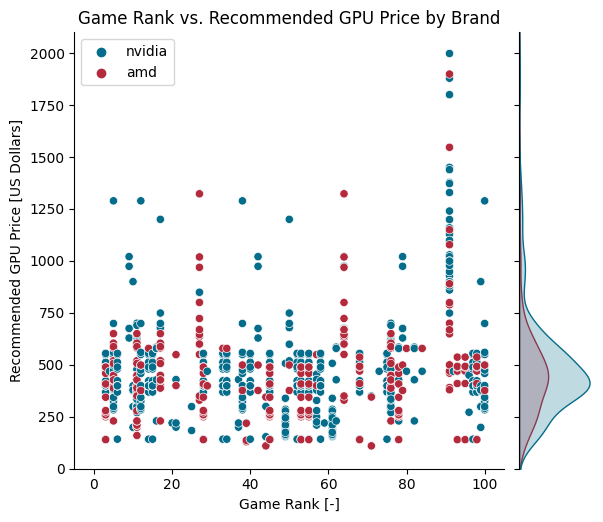

In [94]:
# # prevent datframe from being truncated
# pd.set_option('display.max_rows'   , 20)
# pd.set_option('display.max_columns', 20)

# create a dataframe from new_rows for recommended gpu requirements
df_steam_rec_gpu = pd.DataFrame(new_rows['rec'])
# df_steam_rec_gpu

# plot the price of the recommended nvidia gpu as box plots grouped by game rank
plt.figure()
sns.jointplot(x='rank', y='cost', data=df_steam_rec_gpu, hue='brand', palette={'nvidia': '#046d8b', 'amd': '#b42a3d'})
plt.title('Game Rank vs. Recommended GPU Price by Brand')
plt.xlabel('Game Rank [-]')
plt.ylabel('Recommended GPU Price [US Dollars]')
plt.legend(loc='upper left')
plt.xlim(-5, 105)
plt.ylim(0, 2100)
plt.gcf().get_children()[2].remove()
plt.show()


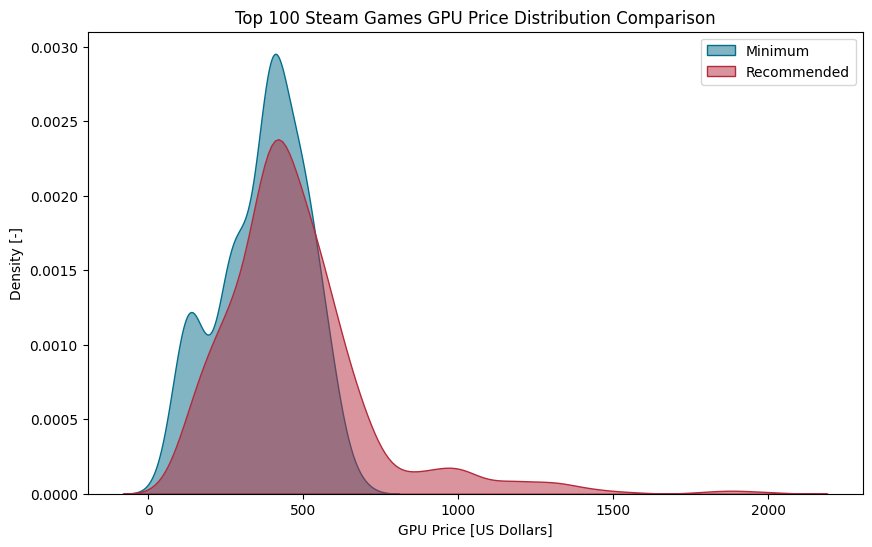

In [95]:
# Compare minimum and recommended gpu prices with a density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_steam_min_gpu['cost'], label='Minimum'    , color='#046d8b', fill=True, alpha=0.5)
sns.kdeplot(data=df_steam_rec_gpu['cost'], label='Recommended', color='#b42a3d', fill=True, alpha=0.5)
plt.title('Top 100 Steam Games GPU Price Distribution Comparison')
plt.xlabel('GPU Price [US Dollars]')
plt.ylabel('Density [-]')
plt.legend(loc='upper right')
plt.show()